## Importações

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [23]:
data = pd.read_csv('ObesityDataSet.csv')
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Descrição dos preditores

avg_outflow: dsadsa
dsada: ffsa

## Descrevendo o conjunto de dados

In [25]:
# 1
columns = data.columns
N = data.shape[0] # amostras
D = data.shape[1] - 1  # preditores
L = data['NObeyesdad'].nunique() # classes
class_distribution = data['NObeyesdad'].value_counts() # distribuição das classes

In [30]:
print(f'Número de amostras (N): {N}')

Número de amostras (N): 2111


In [32]:
# preditores gráfico
print(f'Número de preditores (D): {D}')

Número de preditores (D): 16


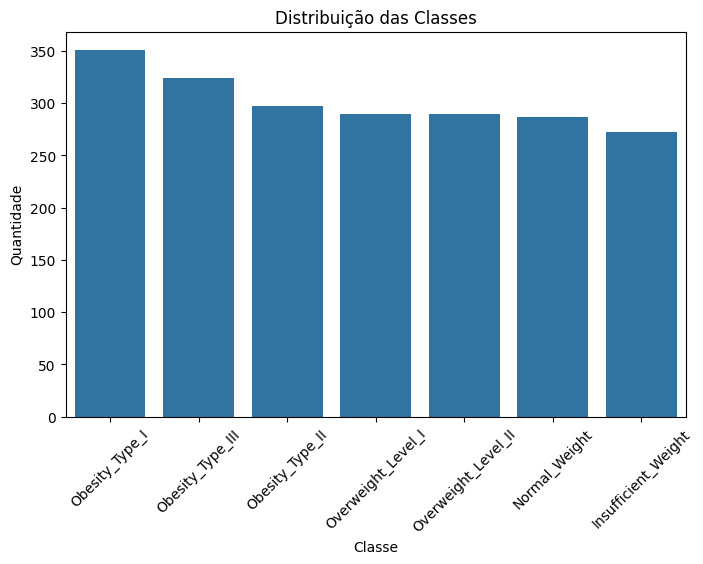

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='NObeyesdad', data=data, order=class_distribution.index)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

## Análise monovariada

In [36]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

print("Variáveis numéricas:")
print(numeric_cols)

Variáveis numéricas:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


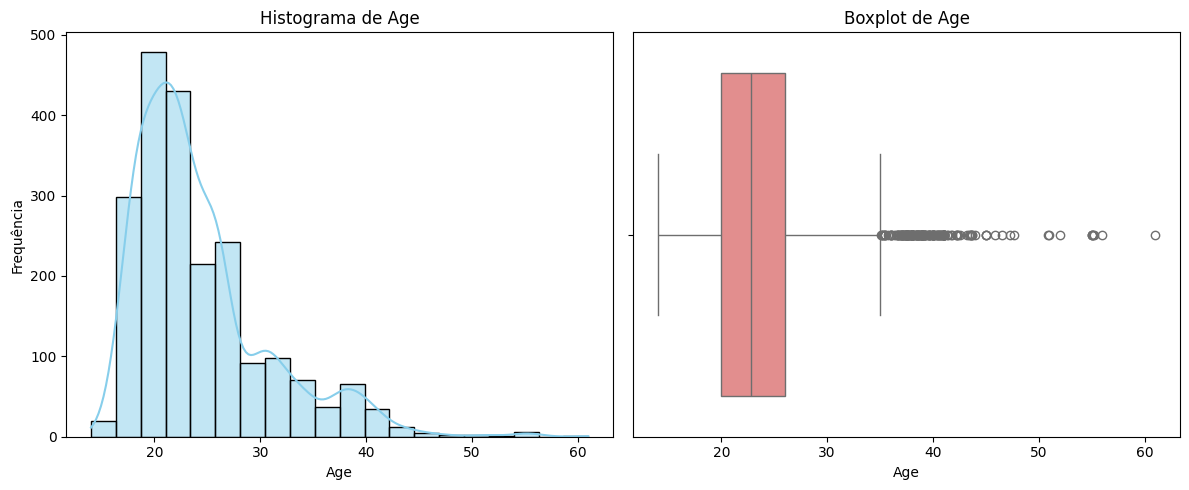

📈 Age
  Média (μ): 24.31
  Desvio padrão (σ): 6.35
  Assimetria (γ): 1.53
----------------------------------------


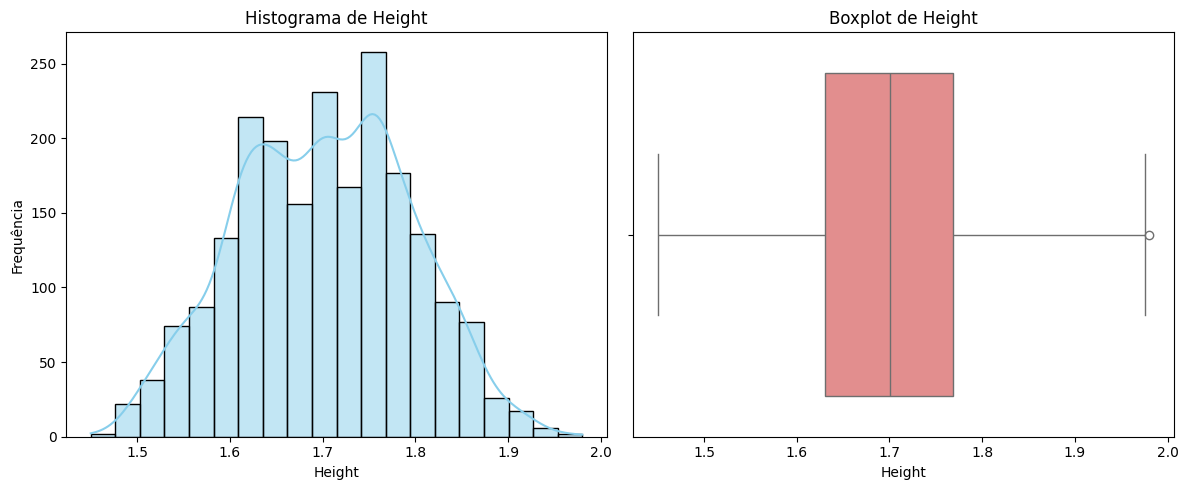

📈 Height
  Média (μ): 1.70
  Desvio padrão (σ): 0.09
  Assimetria (γ): -0.01
----------------------------------------


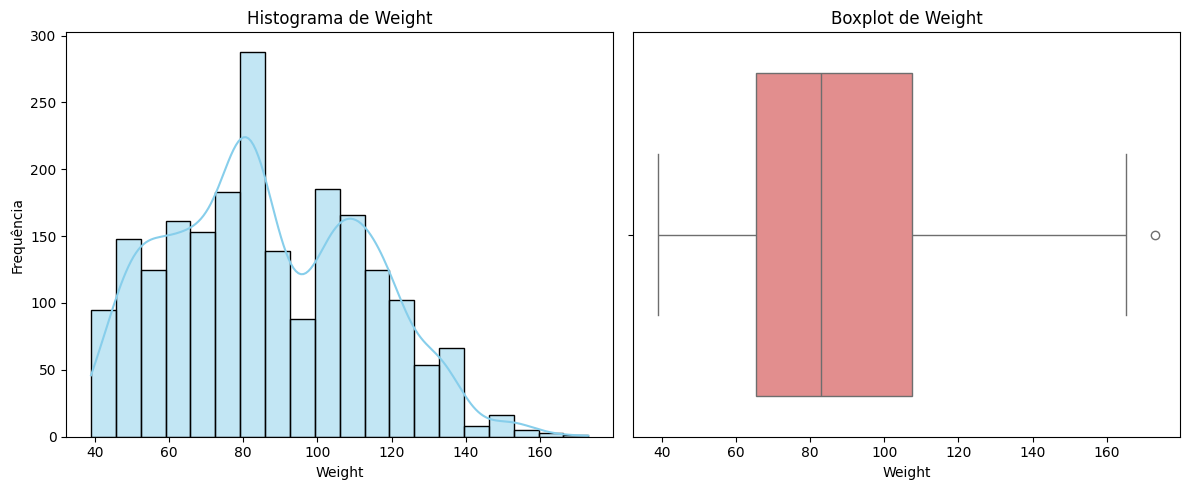

📈 Weight
  Média (μ): 86.59
  Desvio padrão (σ): 26.19
  Assimetria (γ): 0.26
----------------------------------------


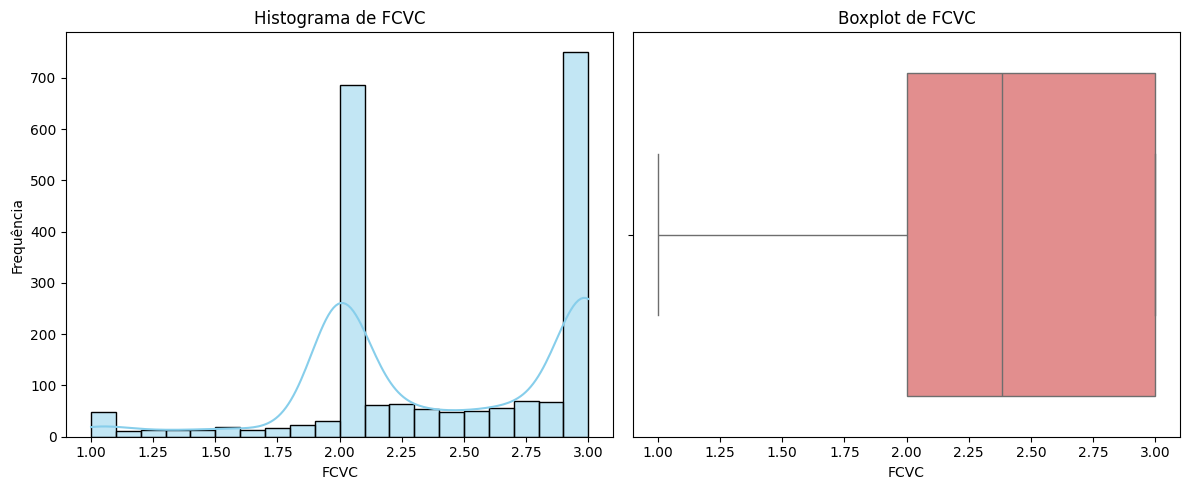

📈 FCVC
  Média (μ): 2.42
  Desvio padrão (σ): 0.53
  Assimetria (γ): -0.43
----------------------------------------


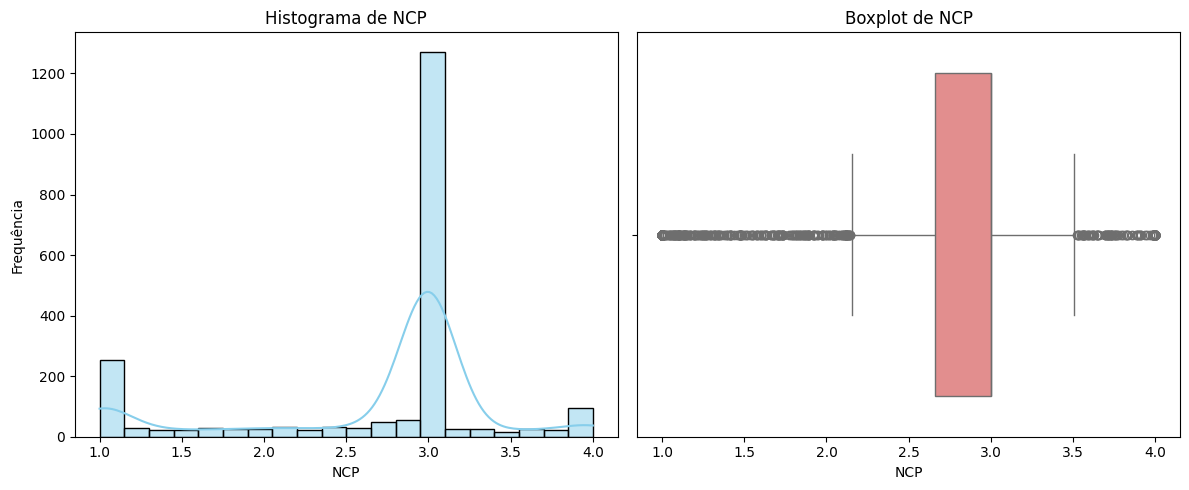

📈 NCP
  Média (μ): 2.69
  Desvio padrão (σ): 0.78
  Assimetria (γ): -1.11
----------------------------------------


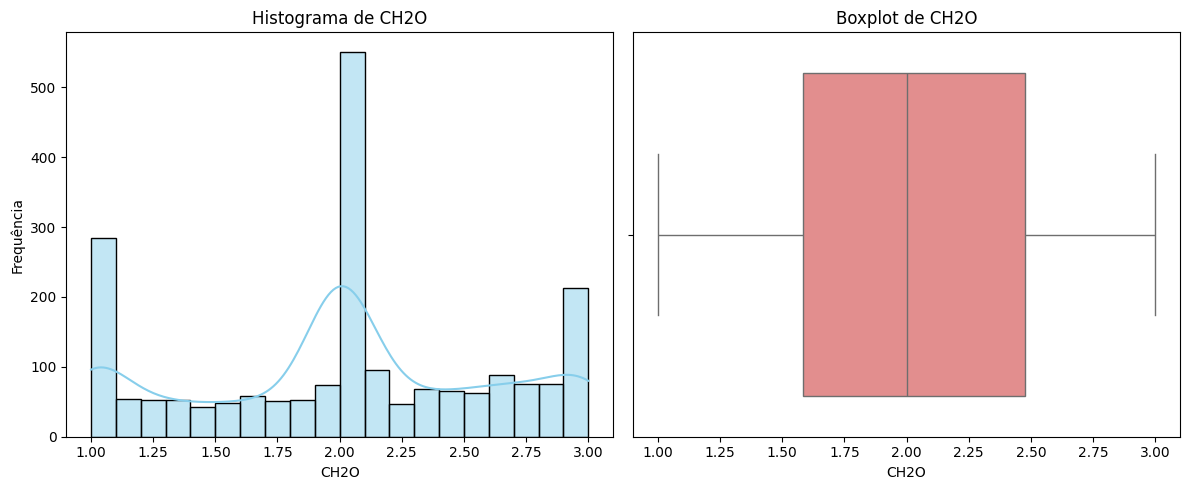

📈 CH2O
  Média (μ): 2.01
  Desvio padrão (σ): 0.61
  Assimetria (γ): -0.10
----------------------------------------


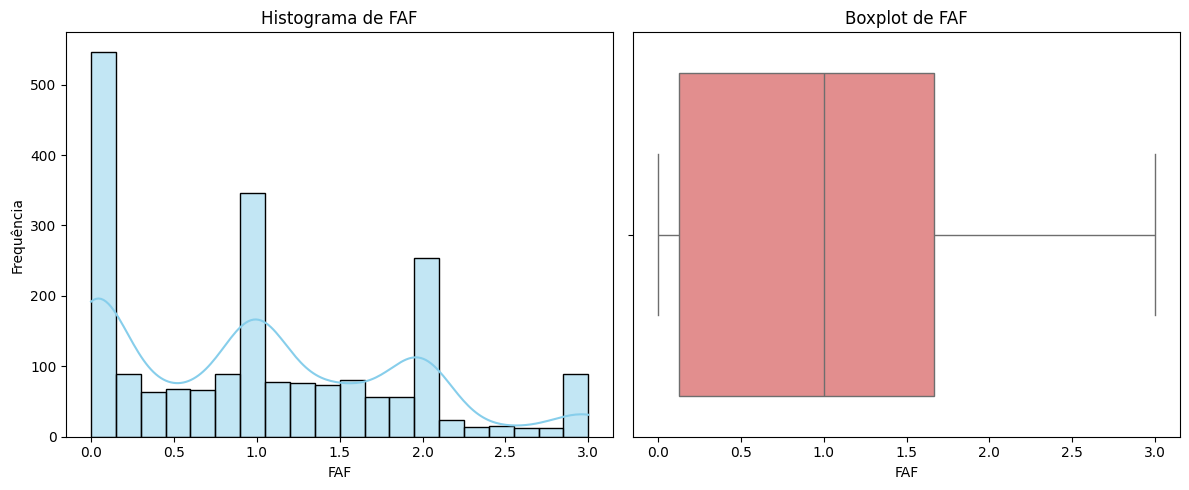

📈 FAF
  Média (μ): 1.01
  Desvio padrão (σ): 0.85
  Assimetria (γ): 0.50
----------------------------------------


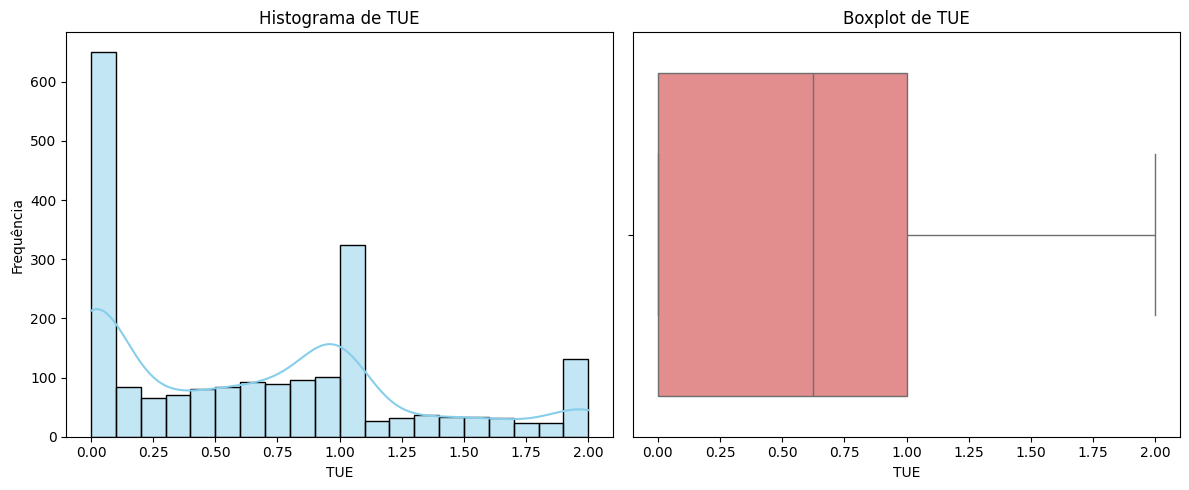

📈 TUE
  Média (μ): 0.66
  Desvio padrão (σ): 0.61
  Assimetria (γ): 0.62
----------------------------------------


In [ ]:
# Cria o conjunto de figuras para cada variável numérica
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Subplot 1: histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Subplot 2: boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

    # Calculo das estatísticas
    mean = data[col].mean()
    std = data[col].std()
    skewness = skew(data[col].dropna())

    print(f"📈 {col}")
    print(f"  Média (μ): {mean:.2f}")
    print(f"  Desvio padrão (σ): {std:.2f}")
    print(f"  Assimetria (γ): {skewness:.2f}")
    print("-"*40)
